# EXPLORATORY DATA ANALYSIS (EDA)

### GOALS:

1) Please provide details on 
   - the datasets, 
   - \# of obs,  
   - \# columns, 
   - what the columns are and their types. 
   - If it is geographical, 
     - what areas it cover, 
   - if it is time series, 
     - what time frame it covers. 
   - What is the label you want to predict, 
   - what are the features you use to predict the label. 

2) Develop my proposal a bit more 
     - elaborate on the columns/rows that I want
     - extract out some of the rows or use groupby to take a look at them
     - get more detailed info

# IMPORTS

In [1]:
import os
import pandas as pd
import numpy as np

# EXECUTE

In [2]:
# Get file path
current_path = os.getcwd()
parent_file_path = os.path.dirname(current_path)
file_path = f'{parent_file_path}\\data\\HumData\\20230115-health_indicators_usa.csv'
print('file_path =', file_path)

file_path = c:\Users\GlaDOS\Documents\GitHub\eugene_data606\data\HumData\20230115-health_indicators_usa.csv


Load the WHO Health Indicators Dataset for the USA
- Read CSV as a Pandas dataframe

In [3]:
#! WARNING -- set datatypes
df = pd.read_csv(file_path, 
                 header=[0,1])

c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (20,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's take a look at the top of the DF

In [4]:
df.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,CHILDCAUSE (CODE),CHILDCAUSE (DISPLAY),CHILDCAUSE (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
,#indicator+code,#indicator+name,#indicator+url,#status+code,#status+name,Unnamed: 5_level_1,Unnamed: 6_level_1,#date+year,Unnamed: 8_level_1,#region+code,...,Unnamed: 29_level_1,Unnamed: 30_level_1,Unnamed: 31_level_1,Unnamed: 32_level_1,#indicator+value+num,Unnamed: 34_level_1,Unnamed: 35_level_1,Unnamed: 36_level_1,Unnamed: 37_level_1,Unnamed: 38_level_1
0,GBD_DALYRTAGE,"Age-standardized DALYs (per 100,000)",https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2000,2000,NaN,AMR,...,NaN,NaN,NaN,"20,107",20107.09961,NaN,NaN,NaN,NaN,NaN
1,GBD_DALYRTAGE,"Age-standardized DALYs (per 100,000)",https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2012,2012,NaN,AMR,...,NaN,NaN,NaN,"22,775",22775.19922,NaN,NaN,NaN,NaN,NaN
2,WHS2_126,Distribution of years of life lost by major ca...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2012,2012,NaN,AMR,...,NaN,NaN,NaN,12,12.00000,NaN,NaN,NaN,NaN,NaN
3,WHOSIS_000004,Adult mortality rate (probability of dying bet...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2002,2002,NaN,AMR,...,NaN,NaN,NaN,145,145.30790,NaN,NaN,NaN,NaN,NaN
4,WHOSIS_000004,Adult mortality rate (probability of dying bet...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2002,2002,NaN,AMR,...,NaN,NaN,NaN,115,114.89800,NaN,NaN,NaN,NaN,NaN


NOTES:
- (FIXED) Row 0: might be some kind of note or extended 2 row header 

QUESTIONS:
- What's GHO?
  - GHO = [Global Health Observatory](https://en.wikipedia.org/wiki/Global_Health_Observatory)

Let's take a look at some general info about this DF

In [5]:
def eda_shape(df):
    """
    Summary:
        Prints general info about a DF's shape, rows, col's, etc with annotations

    Args:
        df (df): Pandas DF
    """
    
    print('CHARACTERISTIC | VALUE')
    print('Dimensions   =', df.ndim)
    print('Objects      =', df.size)
    print('Shape        =', df.shape)
    print('Rows         =', df.shape[0])
    print('Columns      =', df.shape[1])

In [6]:
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions   = 2
Objects      = 780819
Shape        = (20021, 39)
Rows         = 20021
Columns      = 39


Let's look at each column
- check # of row entries and how many aren't empty
- check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   (GHO (CODE), #indicator+code)                          20021 non-null  object 
 1   (GHO (DISPLAY), #indicator+name)                       20021 non-null  object 
 2   (GHO (URL), #indicator+url)                            19940 non-null  object 
 3   (PUBLISHSTATE (CODE), #status+code)                    20021 non-null  object 
 4   (PUBLISHSTATE (DISPLAY), #status+name)                 20021 non-null  object 
 5   (PUBLISHSTATE (URL), Unnamed: 5_level_1)               0 non-null      float64
 6   (YEAR (CODE), Unnamed: 6_level_1)                      19985 non-null  object 
 7   (YEAR (DISPLAY), #date+year)                           19985 non-null  object 
 8   (YEAR (URL), Unnamed: 8_level_1)              

CONCLUSIONS:
- dtypes: 
  - float64(13) --> numerical columns
  - object(26) --> strings (categorical) columns

In [8]:
# NOTE - REPEATED - in df.info, but handy for proposal requirements
df.dtypes

GHO (CODE)                      #indicator+code          object
GHO (DISPLAY)                   #indicator+name          object
GHO (URL)                       #indicator+url           object
PUBLISHSTATE (CODE)             #status+code             object
PUBLISHSTATE (DISPLAY)          #status+name             object
PUBLISHSTATE (URL)              Unnamed: 5_level_1      float64
YEAR (CODE)                     Unnamed: 6_level_1       object
YEAR (DISPLAY)                  #date+year               object
YEAR (URL)                      Unnamed: 8_level_1      float64
REGION (CODE)                   #region+code             object
REGION (DISPLAY)                #region+name             object
REGION (URL)                    Unnamed: 11_level_1     float64
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1      object
STARTYEAR                       #date+year+start        float64
ENDYEAR                         #date+year+end          float64
WORLDBANKINCOMEGROUP (DISPLAY)  Unnamed:

Summary statistics
- WARNING: 
  - `df.describe()` only works on the 13 numerical columns
  - some of these might not be properly classed as numerical afterall...

In [9]:
df.describe()

,PUBLISHSTATE (URL),YEAR (URL),REGION (URL),STARTYEAR,ENDYEAR,WORLDBANKINCOMEGROUP (URL),COUNTRY (URL),AGEGROUP (URL),SEX (URL),GHECAUSES (URL),CHILDCAUSE (URL),Numeric,Low,High,StdErr,StdDev
,Unnamed: 5_level_1,Unnamed: 8_level_1,Unnamed: 11_level_1,#date+year+start,#date+year+end,Unnamed: 16_level_1,Unnamed: 19_level_1,Unnamed: 22_level_1,Unnamed: 25_level_1,Unnamed: 28_level_1,Unnamed: 31_level_1,#indicator+value+num,Unnamed: 34_level_1,Unnamed: 35_level_1,Unnamed: 36_level_1,Unnamed: 37_level_1
count,0.0,0.0,0.0,19985.000000,19985.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.671200e+04,8.742000e+03,8.742000e+03,0.0,0.0
mean,NaN,NaN,NaN,2005.636327,2005.644083,NaN,NaN,NaN,NaN,NaN,NaN,2.075263e+06,1.926412e+04,2.808063e+04,NaN,NaN
std,NaN,NaN,NaN,11.853238,11.851406,NaN,NaN,NaN,NaN,NaN,NaN,2.473609e+08,1.236897e+05,1.864816e+05,NaN,NaN
min,NaN,NaN,NaN,1949.000000,1949.000000,NaN,NaN,NaN,NaN,NaN,NaN,-3.400000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,2000.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+00,4.538365e+00,5.716355e+00,NaN,NaN
50%,NaN,NaN,NaN,2008.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.797554e+01,1.722547e+01,2.193290e+01,NaN,NaN
75%,NaN,NaN,NaN,2014.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.985302e+01,6.260000e+01,7.267961e+01,NaN,NaN
max,NaN,NaN,NaN,2025.000000,2025.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.197287e+10,2.045159e+06,3.230816e+06,NaN,NaN


Let's see how many empty values there are
- NOTE: if 20022 rows of nulls, then the entire column is empty --> can remove from consideration
- TODO: Prof said to change the import rules instead so it doesn't need to import null columns

In [10]:
df.isnull().sum()

GHO (CODE)                      #indicator+code             0
GHO (DISPLAY)                   #indicator+name             0
GHO (URL)                       #indicator+url             81
PUBLISHSTATE (CODE)             #status+code                0
PUBLISHSTATE (DISPLAY)          #status+name                0
PUBLISHSTATE (URL)              Unnamed: 5_level_1      20021
YEAR (CODE)                     Unnamed: 6_level_1         36
YEAR (DISPLAY)                  #date+year                 36
YEAR (URL)                      Unnamed: 8_level_1      20021
REGION (CODE)                   #region+code               41
REGION (DISPLAY)                #region+name               41
REGION (URL)                    Unnamed: 11_level_1     20021
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1     17300
STARTYEAR                       #date+year+start           36
ENDYEAR                         #date+year+end             36
WORLDBANKINCOMEGROUP (DISPLAY)  Unnamed: 15_level_1     17300
WORLDBAN

Get a list of which columns are 100% null

In [11]:
def eda_null(df):
    """
    Summary:
        If column is completely empty, then list column # and header

    Args:
        df (df): Pandas DF
    """

    print(f'List of empty columns:')
    print(f'COL # | COL NAME')

    columns = 0
    nulls = 0
    
    # Go thru each column
    for column in df:
        #print(df[column].name)    
        
        # CASE #1 - Check if # of nulls is the full length of the DF
        if df.isnull().sum()[column] == len(df):
            
            # Get the index of column
            col_index = df.columns.get_loc(column)  
            
            # Print column # and column      
            print(f'{col_index} = {df[column].name[0]}')
            
            # Increment the nulls counter
            nulls += 1
        
        # CASE #2 - No nulls at all
        elif columns == df.shape[1] - 1 & nulls == 0:
            print('(no nulls detected)')
        
        columns += 1

In [12]:
eda_null(df)

List of empty columns:
COL # | COL NAME
(no nulls detected)
5 = PUBLISHSTATE (URL)
8 = YEAR (URL)
11 = REGION (URL)
16 = WORLDBANKINCOMEGROUP (URL)
19 = COUNTRY (URL)
22 = AGEGROUP (URL)
25 = SEX (URL)
28 = GHECAUSES (URL)
31 = CHILDCAUSE (URL)
36 = StdErr
37 = StdDev


In [13]:
# *TODO - filter these out of the DF 
# *NOTE - some of these are empty because of the chosen dataset (ex: COUNTRY because I'm already in the US country subset of data)

Let's check for unique values in each column

In [14]:
df.nunique()

GHO (CODE)                      #indicator+code          1320
GHO (DISPLAY)                   #indicator+name          1319
GHO (URL)                       #indicator+url            820
PUBLISHSTATE (CODE)             #status+code                1
PUBLISHSTATE (DISPLAY)          #status+name                1
PUBLISHSTATE (URL)              Unnamed: 5_level_1          0
YEAR (CODE)                     Unnamed: 6_level_1         95
YEAR (DISPLAY)                  #date+year                 95
YEAR (URL)                      Unnamed: 8_level_1          0
REGION (CODE)                   #region+code                3
REGION (DISPLAY)                #region+name                3
REGION (URL)                    Unnamed: 11_level_1         0
WORLDBANKINCOMEGROUP (CODE)     Unnamed: 12_level_1         1
STARTYEAR                       #date+year+start           76
ENDYEAR                         #date+year+end             76
WORLDBANKINCOMEGROUP (DISPLAY)  Unnamed: 15_level_1         1
WORLDBAN

In [15]:
# Get columns in a list format

# print(df.columns)
# print('length of df.columns =', len(df.columns))

column_number = 0

print('COL # | COL NAME')

while column_number < len(df.columns):
    print(f'{column_number} =', df.columns[column_number][0])
    column_number += 1

COL # | COL NAME
0 = GHO (CODE)
1 = GHO (DISPLAY)
2 = GHO (URL)
3 = PUBLISHSTATE (CODE)
4 = PUBLISHSTATE (DISPLAY)
5 = PUBLISHSTATE (URL)
6 = YEAR (CODE)
7 = YEAR (DISPLAY)
8 = YEAR (URL)
9 = REGION (CODE)
10 = REGION (DISPLAY)
11 = REGION (URL)
12 = WORLDBANKINCOMEGROUP (CODE)
13 = STARTYEAR
14 = ENDYEAR
15 = WORLDBANKINCOMEGROUP (DISPLAY)
16 = WORLDBANKINCOMEGROUP (URL)
17 = COUNTRY (CODE)
18 = COUNTRY (DISPLAY)
19 = COUNTRY (URL)
20 = AGEGROUP (CODE)
21 = AGEGROUP (DISPLAY)
22 = AGEGROUP (URL)
23 = SEX (CODE)
24 = SEX (DISPLAY)
25 = SEX (URL)
26 = GHECAUSES (CODE)
27 = GHECAUSES (DISPLAY)
28 = GHECAUSES (URL)
29 = CHILDCAUSE (CODE)
30 = CHILDCAUSE (DISPLAY)
31 = CHILDCAUSE (URL)
32 = Display Value
33 = Numeric
34 = Low
35 = High
36 = StdErr
37 = StdDev
38 = Comments


# EXPLORING SOME ODDITIES

### Year columns
- What is going on there?
- Let's extract all the year columns
- Then just get the unique values

In [16]:
# Create a list of columns
list_of_cols = ['YEAR (CODE)', 'YEAR (DISPLAY)', 'YEAR (URL)', 'STARTYEAR', 'ENDYEAR']
#print(list_of_cols)
#print(df.loc[:, list_of_cols])

# Display those columns in a table
df_year_cols = df.loc[:, list_of_cols]
df_year_cols

,YEAR (CODE),YEAR (DISPLAY),YEAR (URL),STARTYEAR,ENDYEAR
,Unnamed: 6_level_1,#date+year,Unnamed: 8_level_1,#date+year+start,#date+year+end
0,2000,2000,NaN,2000.0,2000.0
1,2012,2012,NaN,2012.0,2012.0
2,2012,2012,NaN,2012.0,2012.0
3,2002,2002,NaN,2002.0,2002.0
4,2002,2002,NaN,2002.0,2002.0
...,...,...,...,...,...
20016,2014,2014,NaN,2014.0,2014.0
20017,2015,2015,NaN,2015.0,2015.0
20018,2016,2016,NaN,2016.0,2016.0


In [17]:
# NOTE: nunique() requires a DF (doesn't work on single columns, which is a series)
df[list_of_cols].nunique()

YEAR (CODE)     Unnamed: 6_level_1    95
YEAR (DISPLAY)  #date+year            95
YEAR (URL)      Unnamed: 8_level_1     0
STARTYEAR       #date+year+start      76
ENDYEAR         #date+year+end        76
dtype: int64

# Filtering data

### Removing null columns

Some of the columns are empty just because of the subset of the data I've chosen, such as `COUNTRY` since this is a US-based subset already. Such columns can be removed without adversely affecting the data analysis for not. NOTE: if expanding to more countries, I'll need to add it back in the future

In [18]:
def my_find_null_cols(df):
    '''
        GOAL = Find columns that are null, gather into a list of null columns, filter them out of DF
        INPUT = DF
        OUTPUT = DF without the null columns
    '''    
    
    # VARIABLES
    list_of_null_cols = []
    
    # Go thru each column
    for column in df:
        #print(df[column].name)    
        
        # CASE #1 - Is # of nulls in this column the full length of the DF?
        if df.isnull().sum()[column] == len(df):
            
            # Get the this column's index
            col_index = df.columns.get_loc(column)  
            
            # Print column # and column      
            #print(f'{col_index} = {df[column].name[0]}')
            
            # Add column's index to list of nulls
            list_of_null_cols.append(col_index)
    
    # Print list of nulls
    print(f'List of empty columns index: {list_of_null_cols}')
    print(f'Length of this list = {len(list_of_null_cols)}')
    
    # Drop columns by index in list of nulls
    df_no_nulls = df.drop(columns = df.columns[[list_of_null_cols]],
                          axis = 1)
    
    return df_no_nulls
    
df_no_nulls = my_find_null_cols(df)

List of empty columns index: [5, 8, 11, 16, 19, 22, 25, 28, 31, 36, 37]
Length of this list = 11


c:\tools\Anaconda3\envs\data601-intro_to_DS_20220604\lib\site-packages\pandas\core\indexes\multi.py:2060: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_codes = [level_codes[key] for level_codes in self.codes]


In [19]:
# CHECK
# What is the shape now? 
# Did it actually drop those columns?
# There should be an 11 column difference - YES!

print('original DF shape =', df.shape)
print('df_no_nulls shape =', df_no_nulls.shape)

original DF shape = (20021, 39)
df_no_nulls shape = (20021, 28)


### Extracting values of interest

Column 1 
- REMEMBER: Python starts counting @0
- Col #1 contains the Global Health Indicators, let's look at those

In [20]:
# How many unique values in column 1?
column_1_unique = len(df.iloc[:,1].unique())
print('column_1_unique vals = ', column_1_unique)

column_1_unique vals =  1319


In [21]:
# Isolate just the first column
column_1 = df.iloc[:,1]
column_1 = column_1.unique()

# Print them all out
for row in column_1:
    print(row)

Age-standardized DALYs (per 100,000)
Distribution of years of life lost by major cause group
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)
Distribution of causes of death among children aged < 5 years (%)
Number of maternal deaths
Maternal mortality ratio (per 100 000 live births)
Stillbirth rate (per 1000 total births)
Life expectancy at age 60 (years)
nMx - age-specific death rate between ages x and x+n
ndx - number of people dying between ages x and x+n
nqx - probability of dying between ages x and x+n
lx - number of people left alive at age x
nLx - person-years lived between ages x and x+n
Tx - person-years lived above age x
ex - expectation of life at age x
Age-standardized NCD mortality rate  (per 100 000 population)
Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years)
Number of deaths among children ages 5 to 9 years
Number of infant deaths (between birth and 11 months)
Infant mortality rate (between

In [22]:
# Set new file path for text output
output_file_path = f'{parent_file_path}\\output\\Humdata_col_1_unique-GHI.txt'

# Save to a text file for easier reading
with open(output_file_path, 'w+') as file:
    
    # Iterate thru rows of column 1's unique values
    for row in column_1:
    #print(row)
        
        file.write(f'{row}\n')

In [23]:
# ### Rows to keep (EXACT NAMES!)
# - too many seem useful... pick just a few to sample first

# Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)
# Distribution of causes of death among children aged < 5 years (%)
# Number of maternal deaths
# Maternal mortality ratio (per 100 000 live births)
# Stillbirth rate (per 1000 total births)
# Life expectancy at age 60 (years)
# Age-standardized NCD mortality rate  (per 100 000 population)
# Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years)
# Number of deaths among children ages 5 to 9 years
# Number of infant deaths (between birth and 11 months)
# Infant mortality rate (between birth and 11 months per 1000 live births)
# Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)
# Number of neonatal deaths (0 to 27 days)
# Neonatal mortality rate (0 to 27 days) per 1000 live births) (SDG 3.2.2)
# Number of deaths among children under-five
# Under-five mortality rate (per 1000 live births) (SDG 3.2.1)
# Number of deaths among children ages 10 to 14 years
# Mortality rate among children ages 10 to 14 years (per 1000 children aged 10)
# Skilled health professionals density (per 10 000 population)
# Estimated direct deaths from major conflicts (per 100 000 population)
# Average death rate due to natural disasters (per 100 000 population)
# Life expectancy at birth (years)
# Healthy life expectancy (HALE) at birth (years)
# Healthy life expectancy (HALE) at age 60 (years)
# Mortality rate attributed to unintentional poisoning (per 100 000 population)
# Crude suicide rates (per 100 000 population)
# Girls aged 15 years old that received the recommended doses of HPV vaccine (%)
# Women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (%)
# Adolescent birth rate (per 1000 women)
# Reported number of people requiring interventions against NTDs
# Births attended by skilled health personnel (%)
# Concentrations of fine particulate matter (PM2.5)
# Concentrations of fine particulate matter (PM2.5)
# Ambient and household air pollution attributable death rate (per 100 000 population)
# Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)
# New HIV infections (per 1000 uninfected population)
# Mortality rate attributed to exposure to unsafe WASH services (per 100 000 population) (SDG 3.9.2)
# Maternal mortality ratio (per 100 000 live births) - Country reported estimates
# Antenatal care coverage - at least four visits (%)
# Radiotherapy units (per 1 000 000 population)
# Donor commitments (Million, constant 2009 US$)
# Number of licensed qualified surgeons actively working
# Number of licensed qualified anaesthesiologists actively working
# Number of licensed qualified obswtetricians actively working
# Biomedical engineers density (per 10 000 population)
# Number of biomedical engineers
# Biomedical technicians density (per 10 000 population)
# Number of biomedical technicians
# Status of indigenous malaria cases
# Estimated number of malaria cases
# Estimated malaria incidence (per 1000 population at risk)
# Number of indigenous malaria cases
# Estimated number of malaria deaths
# Estimated malaria mortality rate (per 100 000 population)
# Smear-positive tuberculosis case-detection rate (%)
# Tuberculosis - new and relapse cases (TB_c_newinc)
# Minimum legal drinking age

### QUESTIONS
- nMx, ndx, nqx, lx, nLx, Tx, ex --> what does these mean?
- NCD mortality? 
  - Noncommunicable diseases

### Rows to sample for a test run (EXACT NAMES!)

In [24]:
list_of_cols_alcohol_test = [# 'Alcohol-related disease mortality, per 100,000 (15+ years)',
                        # 'Alcohol-related injury mortality, per 1,000',
                        # 'Alcohol, abstainers lifetime (%)',
                        # 'Alcohol, former drinkers (%)',
                        # 'Alcohol, consumers past 12 months (%)',
                        # 'Alcohol dependence (15+ ), 12-month prevalence (%) with 95%CI',
                        # 'Alcohol-related road traffic crashes, per 100,000 population',
                        'Alcohol-related road traffic crashes (% of all traffic crashes)',]

In [25]:
#TEST
column_1_header = df.columns.values[1]
print(column_1_header)

df_test = df[column_1_header]
print(df_test)

('GHO (DISPLAY)', '#indicator+name')
0                     Age-standardized DALYs (per 100,000)
1                     Age-standardized DALYs (per 100,000)
2        Distribution of years of life lost by major ca...
3        Adult mortality rate (probability of dying bet...
4        Adult mortality rate (probability of dying bet...
                               ...                        
20016                GDP per capita annual growth rate (%)
20017                GDP per capita annual growth rate (%)
20018                GDP per capita annual growth rate (%)
20019                GDP per capita annual growth rate (%)
20020                GDP per capita annual growth rate (%)
Name: (GHO (DISPLAY), #indicator+name), Length: 20021, dtype: object


In [26]:
# TEST - Filter by rows of interest
# NOTE - most of the columns are actually NULL, so let's drop them to make reading this more manageable
df_alcohol_test = df[df[column_1_header].isin(list_of_cols_alcohol_test)]
df_alcohol_test = df_alcohol_test.dropna(axis=1)
df_alcohol_test

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),YEAR (CODE),YEAR (DISPLAY),REGION (CODE),REGION (DISPLAY),STARTYEAR,ENDYEAR,COUNTRY (CODE),COUNTRY (DISPLAY),Display Value
,#indicator+code,#indicator+name,#indicator+url,#status+code,#status+name,Unnamed: 6_level_1,#date+year,#region+code,#region+name,#date+year+start,#date+year+end,#country+code,#country+name,Unnamed: 32_level_1
6472,SA_0000001471,Alcohol-related road traffic crashes (% of all...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2012,2012,AMR,Americas,2012.0,2012.0,USA,United States of America,31.8
6479,SA_0000001471,Alcohol-related road traffic crashes (% of all...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2013,2013,AMR,Americas,2013.0,2013.0,USA,United States of America,31
6483,SA_0000001471,Alcohol-related road traffic crashes (% of all...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,2008,2008,AMR,Americas,2008.0,2008.0,USA,United States of America,11.2


In [27]:
# #* TODO - COMMENT OUT AFTER 1 RUN!!!
# # Export to CSV 

# #parent_file_path = os.path.dirname(current_path)
# alcohol_test_file_path = f'{parent_file_path}\\output\\Humdata_alcohol_test.csv'
# df_alcohol_test.to_csv(alcohol_test_file_path)

# TEST - OData API

### SOURCES:
- [GHO OData API](https://www.who.int/data/gho/info/gho-odata-api)
- [OData v2](https://www.odata.org/documentation/odata-version-2-0/uri-conventions/)
- [TDS](https://towardsdatascience.com/analyze-data-from-the-world-health-organization-global-health-observatory-723418d3642b)

GOAL:
- Obtain WHO Global Observatory (GO) records in JSON format with the GHO Odata API for IndicatorCode: NCDMORT3070

INDICATOR NAME: 
- Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.

DESCRIPTION:
- Convert the JSON records to a Python list of dictionaries. 
- Then, write select fields for records with a SpatialDimType of "COUNTRY" to the specified CSV output file.

SOURCE:
- https://towardsdatascience.com/analyze-data-from-the-world-health-organization-global-health-observatory-723418d3642b

In [28]:
# IMPORTS
import requests
import json
import csv

class c_who_mortality_data:

    def __init__(self, out_file_nm):

        # Set the file name variable and create the parameters for the API request.
        self.out_file_nm = out_file_nm
        headers = {'Content-type': 'application/json'}

        # Get data in JSON format and then write it to a CSV file.
        data_list = self.get_data(headers)
        self.write_data_to_csv(data_list)

    def get_data(self, headers):
        """  
        Post the data request to the BLS API. Return the resulting JSON structure.
        """
        post = requests.post('https://ghoapi.azureedge.net/api/NCDMORT3070', headers = headers)
        data = json.loads(post.text)
        data_list = data['value']

        return data_list

    def write_data_to_csv(self, data_list):
        """
        Convert the data from a list of dictionaries --> CSV 
        Write each record to the specified output file.
        """
        # Open the output file. 
        # Then, set up the field names for the CSV records and set up the CSV writer.
        with open(self.out_file_nm, 
                  mode = 'w+', 
                  newline = '') as data_file:

            data_writer = csv.writer(data_file, 
                                     delimiter = ',', 
                                     quotechar = '"', 
                                     quoting = csv.QUOTE_ALL)
            
            # Write CSV file header.
            header = ['country_code', 'year', 'sex', 'value']
            data_writer.writerow(header)

            # Write each record to the output file.
            for record in data_list:

                spatial_dim_type = record['SpatialDimType']

                # Write COUNTRY records only. 
                # Exclude records for REGIONS, etc.
                # Get the fields of interest.
                if spatial_dim_type == 'COUNTRY':

                    country_code = record['SpatialDim']
                    year = record['TimeDim']
                    sex_code = record['Dim1']
                    sex = self.get_sex(sex_code)
                    value = record['NumericValue']

                    # Write the CSV record to the output file.
                    record = [country_code, year, sex, value]
                    data_writer.writerow(record)

        data_file.close()

    def get_sex(sef, sex_code):
        """ 
        Convert the sex code to a sex name.
        """
        sex = ''

        if sex_code == 'FMLE':
            sex = 'Female'
        elif sex_code == 'MLE':
            sex = 'Male'
        elif sex_code == 'BTSX':
            sex = 'Both Sexes'
        else:
           sex = 'Unknown'

        return sex

In [29]:
# IMPORTS
import requests
import json
import csv

In [30]:
# TEST OUTSIDE CLASS

# API URL static variables used to construct the API request
api_url_base    = 'https://ghoapi.azureedge.net/api/'
api_url_dims    = 'Dimension'
headers         = {'Content-type': 'application/json'}

# Print completed API URL 
print(f'test API URL construction = {api_url_base}{api_url_dims}')

test API URL construction = https://ghoapi.azureedge.net/api/Dimension


In [31]:
#* TODO - MOVE TO FUNCTION

# # API request components
# post        = requests.post(f'{api_url_base}{api_url_dims}/', headers = headers)
# data        = json.loads(post.text)
# data_list   = data['value']

# # Print truncated API request results
# print(f'data list = \n{data_list[0:5]} ... truncated')

In [32]:
def who_api(api_url_extras):
    """
    Summary:
        Input the desired API URL command as a string
        Returns the API request as a list type in JSON format

    Args:
        api_url_extras (string): the fully constructed API URL 

    Returns:
        list: JSON output in list format
    """
    
    # API request components
    post        = requests.post(f'{api_url_base}{api_url_extras}/', headers = headers)
    data        = json.loads(post.text)
    data_list   = data['value']
    
    # print(f'data list = {data_list[0:10]} ... truncated')
    
    return data_list

In [33]:
# TEST - just read the top
who_dimensions = who_api(api_url_dims)
who_dimensions[0:5]

[{'Code': 'ADVERTISINGTYPE', 'Title': 'SUBSTANCE_ABUSE_ADVERTISING_TYPES'},
 {'Code': 'AGEGROUP', 'Title': 'Age Group'},
 {'Code': 'ALCOHOLTYPE', 'Title': 'Beverage Types'},
 {'Code': 'AMRGLASSCATEGORY', 'Title': 'AMR GLASS Category'},
 {'Code': 'ARCHIVE', 'Title': 'Archive date'}]

In [34]:
# # Save JSON to file

# # Serializing json
# json_object = json.dumps(who_dimensions, indent=4)

# # Set new file path for text output
# output_file_path = f'{parent_file_path}\\output\\who_dimensions.json'
 
# # Writing to sample.json
# with open(output_file_path, "w+") as file:
#     file.write(json_object)

In [35]:
def json_save(list_of_json, output_file_path):
    """
    Summary:
        Intended to take the output of who_api() which is json in a list format
        Then create a JSON file in the given output file path location

    Args:
        list_of_json (list): json in a list format
        output_file_path (string): string of file path, name and extension of the resulting JSON file to be created
    """
    
    # Serializing json
    json_object = json.dumps(list_of_json, indent=4)
    
    # Writing to output file path 
    with open(output_file_path, "w+") as file:
        file.write(json_object)

In [36]:
# Set new file path for text output
output_file_path = f'{parent_file_path}\\output\\who_dimensions.json'

json_save(who_dimensions, output_file_path)

Which dimensions do I want?

    ALCOHOLTYPE
    AGEGROUP
    BACGROUP
    COUNTRY
    CHILDCAUSE
    CONSUMPTIONTYPE
    SEX
    TIMEPERIOD
    WEALTHDECILE
    YEAR

Let's start with `COUNTRY` first???

WHO GHO DALYs

DALY definition:
-  "One DALY represents the loss of the equivalent of one year of full health. DALYs for a disease or health condition are the sum of the years of life lost to due to premature mortality (YLLs) and the years lived with a disability (YLDs) due to prevalent cases of the disease or health condition in a population."
- SOURCE: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/158#:~:text=Definition%3A-,One%20DALY%20represents%20the%20loss%20of%20the%20equivalent%20of%20one,health%20condition%20in%20a%20population. 


DATA SOURCE: 
- https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/global-health-estimates-leading-causes-of-dalys

In [37]:
def who_api_preformatted(preformatted_api_url):
    """
    Summary:
        Input a preformatted API URL as a string
        Returns the API request as a list type in JSON format

    Args:
        preformatted_api_url (string): the fully constructed API URL 

    Returns:
        list: JSON output in list format
    """
    
    # API request components
    post        = requests.post(f'{preformatted_api_url}')
    data        = json.loads(post.text)
    data_list   = data['value']
    
    # print(f'data list = {data_list[0:10]} ... truncated')
    
    return data_list

In [38]:
#! WARNING - you can't use this as a drop-in replacement for my who_api function
# This preformatted URL for grabbing the USA DALYs provided by the WHO
url_USA_DALY = r'https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA%27%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27%20and%20DIM_YEAR_CODE%20eq%20%272000%27'

#! WARNING - you can't use this as a drop-in replacement for my who_api function
# This preformatted URL for grabbing the USA DALYs provided by the WHO
# DECONSTRUCT THIS

https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?

&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc

&$select=
    DIM_COUNTRY_CODE,
    DIM_GHECAUSE_CODE,
    DIM_GHECAUSE_TITLE,
    DIM_YEAR_CODE,
    DIM_SEX_CODE,
    DIM_AGEGROUP_CODE,
    VAL_DALY_COUNT_NUMERIC,
    VAL_DEATHS_COUNT_NUMERIC,
    ATTR_POPULATION_NUMERIC,
    VAL_DALY_RATE100K_NUMERIC,
    VAL_DEATHS_RATE100K_NUMERIC

&$filter=FLAG_RANKABLE
    %20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA
    %27%20and
    %20DIM_SEX_CODE%20eq%20%27BTSX%27
    %20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27
    %20and%20DIM_YEAR_CODE%20eq%20%272000%27

In [39]:
# TEST

api_url_test = "https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'AIR_11')"

test = who_api_preformatted(api_url_test)
output_file_path = f'{parent_file_path}\\output\\test.json'
json_save(test, output_file_path)


In [40]:
# # TEST - just read the top - CAN'T
# who_USA_DALY = who_api_preformatted(url_USA_DALY)
# who_USA_DALY[0:5]

In [41]:
# # Set new file path for text output
# output_file_path = f'{parent_file_path}\\output\\who_USA_DALY.json'

# json_save(who_USA_DALY, output_file_path)

### [TODO]
- For now I'm just gonna download the JSON output directly from the link: 
- https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA%27%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27%20and%20DIM_YEAR_CODE%20eq%20%272000%27 
- and run it thru Beautiful JSON

### Import JSON into Pandas
- SOURCE: https://konbert.com/blog/convert-json-to-csv-in-python3-using-pandas 

NOTE:
- manually edited the original JSON text, it was originally in a dictonary format
- changed it to a list by removing the key

In [42]:
def json_to_csv_to_df(input_file_path, output_file_path):
    """
    Summary:
        Takes a JSON file and converts it to a CSV file
        Then loads it into Pandas as a DF

    Args:
        input_file_path (string): JSON file path
        output_file_path (string): CSV file path

    Returns:
        pd.dataframe: JSON converted to CSV and loaded into Pandas DF
    """
    
    # Load JSON file
    with open(input_file_path) as file:
        data = json.loads(file.read())
        
    # Normalize the JSON data
    df = pd.json_normalize(data)
    # df.head()

    # Export to CSV
    df.to_csv(output_file_path, 
              index = False)
    
    # Load my CSV into Pandas
    df = pd.read_csv(output_file_path)
    # df.head()
        
    return df

In [43]:
# Set file path to grab JSON file
input_file_path = f'{parent_file_path}\\output\\USA_DALY_download-my_edits.json'

# Set new file path to save my CSV 
output_file_path = f'{parent_file_path}\\output\\USA_DALY_download-my_edits.csv'

# Call JSON conversion function and save to new DF
df = json_to_csv_to_df(input_file_path, output_file_path)
df.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.20
1,USA,2000,ALLAges,BTSX,1140,282000000,Stroke,1177.50,3320540.0,61.00,172034.00
2,USA,2000,ALLAges,BTSX,680,282000000,"Trachea, bronchus, lung cancers",1241.37,3500671.0,55.71,157092.70
3,USA,2000,ALLAges,BTSX,1180,282000000,Chronic obstructive pulmonary disease,1291.42,3641802.0,48.87,137825.70
4,USA,2000,ALLAges,BTSX,950,282000000,Alzheimer disease and other dementias,549.50,1549598.0,30.01,84619.68


In [44]:
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions   = 2
Objects      = 1441
Shape        = (131, 11)
Rows         = 131
Columns      = 11


In [45]:
eda_null(df)

List of empty columns:
COL # | COL NAME
(no nulls detected)


### NOTES:
- limited country to USA again
- it's only 1 yr (2000) of data, would ideally want more years

### URL:
- https://frontdoor-l4uikgap6gz3m.azurefd.net/DEX_CMS/GHE_FULL?&$orderby=VAL_DEATHS_RATE100K_NUMERIC%20desc&$select=DIM_COUNTRY_CODE,DIM_GHECAUSE_CODE,DIM_GHECAUSE_TITLE,DIM_YEAR_CODE,DIM_SEX_CODE,DIM_AGEGROUP_CODE,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_COUNT_NUMERIC,ATTR_POPULATION_NUMERIC,VAL_DALY_RATE100K_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC&$filter=FLAG_RANKABLE%20eq%201%20and%20DIM_COUNTRY_CODE%20eq%20%27USA%27%20and%20DIM_SEX_CODE%20eq%20%27BTSX%27%20and%20DIM_AGEGROUP_CODE%20eq%20%27ALLAges%27%20and%20DIM_YEAR_CODE%20ge%20%272000%27

# NOTE:
- this kinda looks like SQL?
- changed eq 2000 to ge 2000 and I think it's working, new JSON file saved to output folder

### Changed download filter to >= the year 2000

In [46]:
# Set file path to grab JSON file
input_file_path = f'{parent_file_path}\\output\\USA_DALY_download-ge2000.json'

# Set new file path to save my CSV 
output_file_path = f'{parent_file_path}\\output\\USA_DALY_download-ge2000.csv'

# Call JSON conversion function and save to new DF
df = json_to_csv_to_df(input_file_path, output_file_path)
df.head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.2
1,USA,2001,ALLAges,BTSX,1130,285000000,Ischaemic heart disease,3391.24,9665041.0,207.94,592640.8
2,USA,2002,ALLAges,BTSX,1130,287000000,Ischaemic heart disease,3330.55,9558671.0,203.74,584739.8
3,USA,2003,ALLAges,BTSX,1130,290000000,Ischaemic heart disease,3229.69,9366098.0,197.12,571639.9
4,USA,2004,ALLAges,BTSX,1130,292000000,Ischaemic heart disease,3054.78,8919968.0,185.27,540981.5


In [47]:
eda_shape(df)

CHARACTERISTIC | VALUE
Dimensions   = 2
Objects      = 28820
Shape        = (2620, 11)
Rows         = 2620
Columns      = 11


In [48]:
eda_null(df)

List of empty columns:
COL # | COL NAME
(no nulls detected)


In [49]:
# Get unique years 
unique_years = df['DIM_YEAR_CODE'].unique()
print(unique_years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2019 2010 2018 2011
 2012 2013 2015 2017 2016 2014]


### PLANNING
- Split DF by years
- Plot change of DALYs over each year
- Do I need to rearrange the DF?

In [50]:
#TEST
df[df['DIM_YEAR_CODE'] == 2000].head()

,DIM_COUNTRY_CODE,DIM_YEAR_CODE,DIM_AGEGROUP_CODE,DIM_SEX_CODE,DIM_GHECAUSE_CODE,ATTR_POPULATION_NUMERIC,DIM_GHECAUSE_TITLE,VAL_DALY_RATE100K_NUMERIC,VAL_DALY_COUNT_NUMERIC,VAL_DEATHS_RATE100K_NUMERIC,VAL_DEATHS_COUNT_NUMERIC
0,USA,2000,ALLAges,BTSX,1130,282000000,Ischaemic heart disease,3494.57,9854699.0,214.42,604674.20
30,USA,2000,ALLAges,BTSX,1140,282000000,Stroke,1177.50,3320540.0,61.00,172034.00
39,USA,2000,ALLAges,BTSX,680,282000000,"Trachea, bronchus, lung cancers",1241.37,3500671.0,55.71,157092.70
70,USA,2000,ALLAges,BTSX,1180,282000000,Chronic obstructive pulmonary disease,1291.42,3641802.0,48.87,137825.70
99,USA,2000,ALLAges,BTSX,950,282000000,Alzheimer disease and other dementias,549.50,1549598.0,30.01,84619.68


In [56]:
# IMPORTS
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the DF
df_2000 = df[df['DIM_YEAR_CODE'] == 2000]
print(df_2000)

     DIM_COUNTRY_CODE  DIM_YEAR_CODE DIM_AGEGROUP_CODE DIM_SEX_CODE  \
0                 USA           2000           ALLAges         BTSX   
30                USA           2000           ALLAges         BTSX   
39                USA           2000           ALLAges         BTSX   
70                USA           2000           ALLAges         BTSX   
99                USA           2000           ALLAges         BTSX   
...               ...            ...               ...          ...   
2598              USA           2000           ALLAges         BTSX   
2599              USA           2000           ALLAges         BTSX   
2600              USA           2000           ALLAges         BTSX   
2604              USA           2000           ALLAges         BTSX   
2605              USA           2000           ALLAges         BTSX   

      DIM_GHECAUSE_CODE  ATTR_POPULATION_NUMERIC  \
0                  1130                282000000   
30                 1140                2820

<AxesSubplot:xlabel='DIM_GHECAUSE_TITLE', ylabel='VAL_DALY_RATE100K_NUMERIC'>

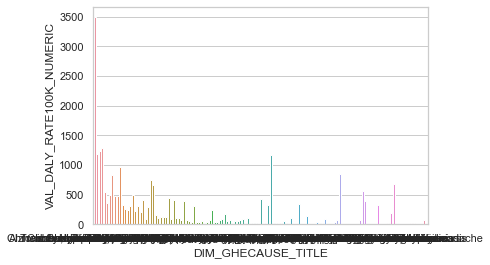

In [58]:
# Selecting style as white,dark, whitegrid, darkgrid, or ticks
sns.set( style = "whitegrid" )
   
# Plot in Seaborn
sns.barplot(data = df_2000,
            x = 'DIM_GHECAUSE_TITLE',
            y = 'VAL_DALY_RATE100K_NUMERIC')

In [ ]:
# TEST
for year in unique_years:
    print('year =', year)
    data = df[df['DIM_YEAR_CODE'] == year]
    print('data =', data)

year = 2000
data =      DIM_COUNTRY_CODE  DIM_YEAR_CODE DIM_AGEGROUP_CODE DIM_SEX_CODE  \
0                 USA           2000           ALLAges         BTSX   
30                USA           2000           ALLAges         BTSX   
39                USA           2000           ALLAges         BTSX   
70                USA           2000           ALLAges         BTSX   
99                USA           2000           ALLAges         BTSX   
...               ...            ...               ...          ...   
2598              USA           2000           ALLAges         BTSX   
2599              USA           2000           ALLAges         BTSX   
2600              USA           2000           ALLAges         BTSX   
2604              USA           2000           ALLAges         BTSX   
2605              USA           2000           ALLAges         BTSX   

      DIM_GHECAUSE_CODE  ATTR_POPULATION_NUMERIC  \
0                  1130                282000000   
30                 1140 

KeyError: 'value'

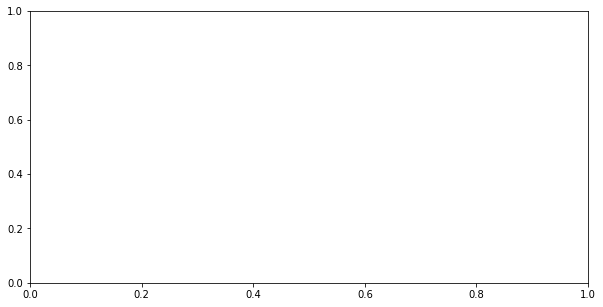

In [ ]:
# IMPORTS
import matplotlib.pyplot as plt 

# Create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Iterate over the years and plot the data
for year in unique_years:
    data = df[df['DIM_YEAR_CODE'] == year]
    ax.plot(data['value'], label=year)

# Add labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()

# Show the plot
plt.show()

# (GENERAL) QUESTIONS:
1) Do I need to include a download script thru Jupyter Notebook?
2) Where to create requirements.txt?   